# Google Colab Image Captioning: Running Code for all dataset sizes

Welcome to this Google Colab notebook, where we will explore the exciting world of image captioning using the Inside Airbnb dataset or a dataset of your own. In this demonstration, I will showcase how to run code on single, few, or large datasets, allowing you to generate descriptive captions for images automatically.

To begin, it's **important to set up your runtime environment appropriately**. I recommend selecting the **GPU T4 runtime with high RAM**, especially if you're using the free version of Google Colab. This choice will enhance the training speed and ensure smooth execution of the image captioning code.

![Colab Runtime definitions](https://i.ibb.co/j34dzFX/colab-settings-image-captioning.png)


If you have access to a more powerful server or a paid version of Google Colab, you can also customize the number of samples per batch to expedite the training process. Adjusting this parameter allows for faster training by processing multiple image-caption pairs simultaneously.

Throughout this notebook, we will guide you through the necessary steps to build image captioning with any dataset that you need. Whether you have a small collection or a massive corpus of images, our code will adapt accordingly to handle the specific data volume efficiently.

Stay tuned as we embark on this journey of image captioning, exploring the magic of neural networks and natural language processing combined. Let's get started!

Please find the code and additional resources on the **[GitHub inside-airbnb repository](https://github.com/shelikohan/inside-airbnb/tree/main)**. Don't forget to give credit where it's due, and feel free to modify the code to suit your requirements.

In [ ]:
!pip install transformers
import sys
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
parent_dir = "/content/drive/MyDrive/image_captions"
sys.path.insert(0, parent_dir)
from image_captions import ImageCaptionProcessor, BatchImageCaptions
from image_captions_csv_job import CSVImageCaptionsJobManager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 114.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.6 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
def join_parent_dir(path):
  return os.path.join(parent_dir, path)
out_path = "outputs3"
processed_path = join_parent_dir(f"{out_path}/processing_info.json")
logger_path = join_parent_dir(f"{out_path}/runtime_logger.log")
picture_url_column = "picture_url"
picture_description_column = "picture_description"

# Image Captioning basics
When performing image captioning tasks, you can utilize the ImageCaptionProcessor class from the image_captions module.
This class provides functionality for generating captions for images using pre-trained models. To create an instance of the ImageCaptionProcessor, use the following code:

In [ ]:
processor = ImageCaptionProcessor()

The ImageCaptionProcessor constructor allows for optional parameters to customize the image captioning process. Some of these parameters include:


*   **hf_model (str)**: Specify the name or path of the pre-trained model to use for image captioning. The default value is "Salesforce/blip-image-captioning-large", which is a popular pre-trained model for image captioning.
*   **max_new_tokens (int)***: Set the maximum number of new tokens allowed in the generated captions. This parameter can help control the length of the captions generated by the model. The default value is 20.
*   **skip_special_tokens (bool)**: Determine whether to skip special tokens (such as <sos>, <eos>, etc.) when generating captions. Setting this parameter to True will exclude special tokens from the generated captions. The default value is True.

In [ ]:
url = "https://www.planetware.com/wpimages/2020/02/france-in-pictures-beautiful-places-to-photograph-eiffel-tower.jpg"
caption = processor.get_caption_from_url(url)
caption

'arafed view of the eiffel tower in paris at sunset'

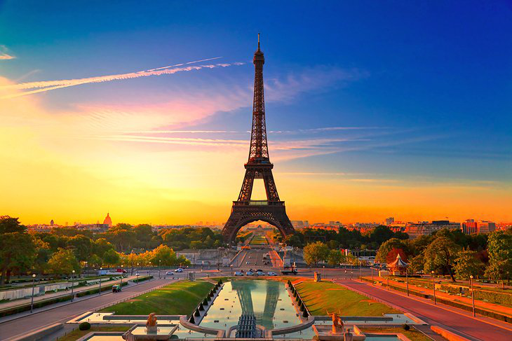

Caption: arafed view of the eiffel tower in paris at sunset


In [ ]:
image_with_caption = processor.get_image_with_caption_from_url(url)
image_with_caption.show()


# Batch Image Captioning

To process batch of images, you can use the BatchImageCaptioning class for batch image captioning, following the steps below. First, create an instance of the class, providing the desired number of CPUs to use for parallel processing (n_cpus), the maximum length of the processing queue (q_len), and the number of images to process in each batch (batch_size). Once the instance is created, you can call the get_image_captions_from_urls method, passing a list of image URLs as input. This method will generate captions for the images in parallel, utilizing the specified number of CPUs. The method returns a list of ImageMetadata objects, each containing the generated caption for an image. For example, I passed a list of 5 image URLs from Airbnb properties in Amsterdam to this method.

In [ ]:
batch_size = 5
processor = BatchImageCaptions(batch_size=5)

In [ ]:
urls = ['https://a0.muscache.com/pictures/10272854/8dcca016_original.jpg',
 'https://a0.muscache.com/pictures/5208672/5bb6091f_original.jpg',
 'https://a0.muscache.com/pictures/3b76222e-ed0a-4a78-8b8a-c64f19fa00c4.jpg',
 'https://a0.muscache.com/pictures/4283713/63eaa97f_original.jpg',
 'https://a0.muscache.com/pictures/b73c16af-4e31-4b61-a948-4a68cdfe3501.jpg']

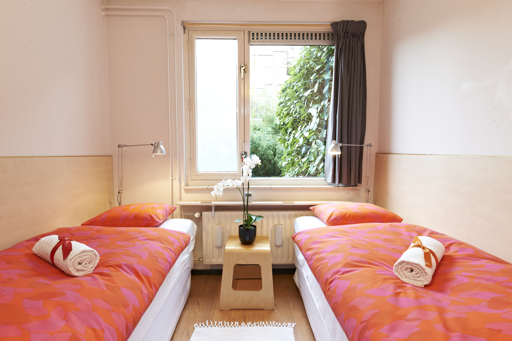

Caption: there are two beds in a small room with a window


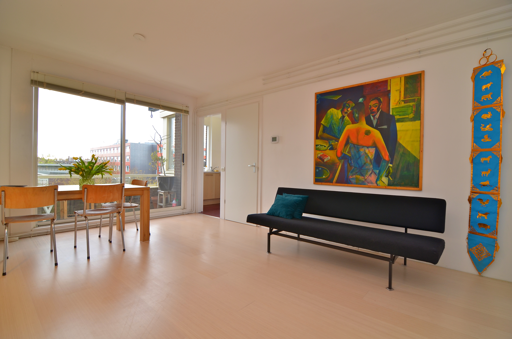

Caption: there is a couch in a room with a painting on the wall


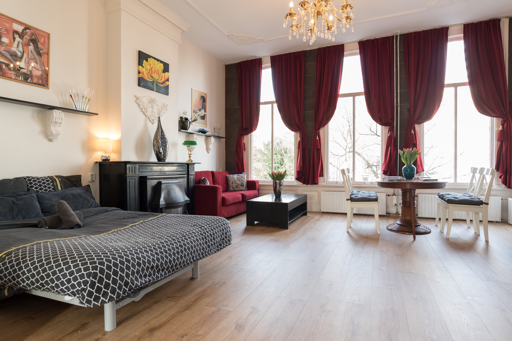

Caption: there is a bed and a couch in a room with a chandelier


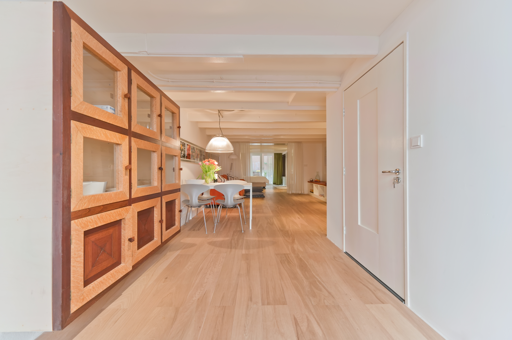

Caption: there is a long hallway with a table and chairs in it


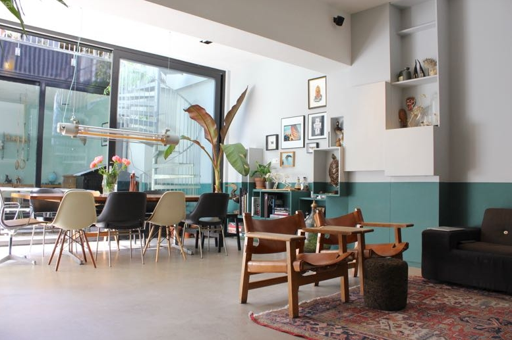

Caption: there is a room with a couch, chairs, tables and a rug


In [ ]:
images = processor.get_image_captions_from_urls(urls)
for image in images:
  image.show()

# Large Dataset Image Captioning

Large Dataset Image captioning are implemented using the abstract class of ImageCaptionsJobManager.
In inside airbnb data we've working with CSV files, hence I created a class named CSVImageCaptionsJobManager, which inherit the ImageCaptionsJobManager.
In order to use it you need to provide the following parameters:

*   **logger_path (str)**: Specify the path to the file logger. This is where log files will be saved to track important events and error messages during the image captioning process.
*   **file_processing_status_path (str)**: Provide the path to the processed status pickle file. This file stores the status of processed batches, allowing for easy retrieval and recovery in case of failures.
*   **picture_url_column (str)**: Specify the column name for picture URLs in the CSV file. This column should contain the URLs pointing to the images to be processed.
*   **picture_description_column (str)**: Specify the column name for picture descriptions in the CSV file. This column will store the image captions after processing.
*   **batch_size (int):** Set the number of samples (images) to include in each batch for processing. For example, if you set batch_size to 128, each batch will contain 128 images from the CSV file. Adjusting this parameter can help optimize processing time and resource usage.

To create an instance of the CSVImageCaptionsJobManager class, use the following code as an example:

In [ ]:

batch_size=32
n_cpus=16
job = CSVImageCaptionsJobManager(logger_path, processed_path, picture_url_column, picture_description_column, batch_size=batch_size, n_cpus=n_cpus)

To illustrate the usage provided 2 input files (sample1, sample2) with 128 properties(1 batch) each, from the inside-airbnb in Amsterdam dataset.

### Process single File (with 64 AirBNB properties):

In [ ]:
sample1  = join_parent_dir("data/the-netherlands.north-holland.amsterdam.2023-03-09_sample1.csv")
out1 = join_parent_dir(f"{out_path}/the-netherlands.north-holland.amsterdam.2023-03-09_sample1_with_descriptions.csv")
job.process_file(sample1, out1)

INFO:image_captioning:done batch 1,Runtime: 35.22 seconds.
INFO:image_captioning:done batch 2,Runtime: 14.57 seconds.
INFO:image_captioning:Finished gracefully /content/drive/MyDrive/image_captions/data/the-netherlands.north-holland.amsterdam.2023-03-09_sample1.csv with 2 batches


In [ ]:
col_names = ['id', 'listing_url', 'scrape_id', "picture_url","picture_description"]
pd.read_csv(out1, usecols=col_names, nrows=5)

,id,listing_url,scrape_id,picture_url,picture_description
0,2818,https://www.airbnb.com/rooms/2818,20230309202119,https://a0.muscache.com/pictures/10272854/8dcc...,there are two beds in a small room with a window
1,311124,https://www.airbnb.com/rooms/311124,20230309202119,https://a0.muscache.com/pictures/5208672/5bb60...,there is a couch in a room with a painting on ...
2,319985,https://www.airbnb.com/rooms/319985,20230309202119,https://a0.muscache.com/pictures/3b76222e-ed0a...,there is a bed and a couch in a room with a ch...
3,327285,https://www.airbnb.com/rooms/327285,20230309202119,https://a0.muscache.com/pictures/4283713/63eaa...,there is a long hallway with a table and chair...
4,331946,https://www.airbnb.com/rooms/331946,20230309202119,https://a0.muscache.com/pictures/b73c16af-4e31...,"there is a room with a couch, chairs, tables a..."


In [ ]:
job.status

{'16,32,cuda,Salesforce/blip-image-captioning-large,cuda,20,True|/content/drive/MyDrive/image_captions/data/the-netherlands.north-holland.amsterdam.2023-03-09_sample1.csv|/content/drive/MyDrive/image_captions/outputs/the-netherlands.north-holland.amsterdam.2023-03-09_sample1_with_descriptions.csv': {'file_path': '/content/drive/MyDrive/image_captions/data/the-netherlands.north-holland.amsterdam.2023-03-09_sample1.csv',
  'out_path': '/content/drive/MyDrive/image_captions/outputs/the-netherlands.north-holland.amsterdam.2023-03-09_sample1_with_descriptions.csv',
  'n_batches': 2,
  'is_done': True,
  'cpu_usage': [7258443776, 7282917376],
  'gpu_usage': [[8515], [9819]],
  'iter_time': [35.21882939338684, 14.57096242904663],
  'ram_usage': [15728099328, 15822065664]}}

### Process Multiple Files (with 64*2 images):

In [ ]:
sample2  = join_parent_dir("data/the-netherlands.north-holland.amsterdam.2023-03-09_sample2.csv")
out2 = join_parent_dir(f"{out_path}/the-netherlands.north-holland.amsterdam.2023-03-09_sample2_with_descriptions.csv")

sample3  = join_parent_dir("data/the-netherlands.north-holland.amsterdam.2023-03-09_sample3.csv")
out3 = join_parent_dir(f"{out_path}/the-netherlands.north-holland.amsterdam.2023-03-09_sample3_with_descriptions.csv")
job.process_files([sample2, sample3], [out2, out3])

INFO:image_captioning:done batch 1,Runtime: 29.30 seconds.
INFO:image_captioning:done batch 2,Runtime: 10.60 seconds.
INFO:image_captioning:Finished gracefully /content/drive/MyDrive/image_captions/data/the-netherlands.north-holland.amsterdam.2023-03-09_sample2.csv with 2 batches
INFO:image_captioning:done batch 1,Runtime: 11.32 seconds.
INFO:image_captioning:done batch 2,Runtime: 10.91 seconds.
INFO:image_captioning:Finished gracefully /content/drive/MyDrive/image_captions/data/the-netherlands.north-holland.amsterdam.2023-03-09_sample3.csv with 2 batches


In [ ]:
job.status

{'16,32,cuda,Salesforce/blip-image-captioning-large,cuda,20,True|/content/drive/MyDrive/image_captions/data/the-netherlands.north-holland.amsterdam.2023-03-09_sample1.csv|/content/drive/MyDrive/image_captions/outputs/the-netherlands.north-holland.amsterdam.2023-03-09_sample1_with_descriptions.csv': {'file_path': '/content/drive/MyDrive/image_captions/data/the-netherlands.north-holland.amsterdam.2023-03-09_sample1.csv',
  'out_path': '/content/drive/MyDrive/image_captions/outputs/the-netherlands.north-holland.amsterdam.2023-03-09_sample1_with_descriptions.csv',
  'n_batches': 2,
  'is_done': True,
  'cpu_usage': [7258443776, 7282917376],
  'gpu_usage': [[8515], [9819]],
  'iter_time': [35.21882939338684, 14.57096242904663],
  'ram_usage': [15728099328, 15822065664]},
 '16,32,cuda,Salesforce/blip-image-captioning-large,cuda,20,True|/content/drive/MyDrive/image_captions/data/the-netherlands.north-holland.amsterdam.2023-03-09_sample2.csv|/content/drive/MyDrive/image_captions/outputs/the-ne